<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch-Coursera/blob/main/Neural_Network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning with PyTorch course
**Step 1. Imports**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# For reproducibility of random initial weights
torch.manual_seed(42)



**Step 2. Defining Neural Network Structure**

In [2]:
def plot_decision_boundary(
    X_data,
    model_weights,
    model_bias,
    ax,
    label,
    linestyle='--',
    color='red',
    show_points=True
):
    """
    Plots the decision boundary for a linear layer (w1*x1 + w2*x2 + b = 0).
    The boundary is where the input to the sigmoid function is 0.
    """

    w1, w2 = model_weights[0, 0].item(), model_weights[0, 1].item()
    b = model_bias[0].item()

    # Create a range of x1 values
    x1_vals = np.linspace(
        X_data[:, 0].min() - 1,
        X_data[:, 0].max() + 1,
        100
    )

    # Calculate corresponding x2 values for the line w1*x1 + w2*x2 + b = 0
    if w2 != 0:  # Avoid division by zero
        x2_vals = (-w1 * x1_vals - b) / w2
        ax.plot(
            x1_vals,
            x2_vals,
            linestyle,
            color=color,
            label=f'{label} (z=0 line)'
        )

    elif w1 != 0:  # Vertical line case
        x1_const = -b / w1
        ax.axvline(
            x1_const,
            linestyle=linestyle,
            color=color,
            label=f'{label} (z=0 line, vertical)'
        )

    # Plot data points for reference
    if show_points:
        ax.scatter(
            X_data[:, 0].numpy(),
            X_data[:, 1].numpy(),
            c='gray',
            alpha=0.5,
            label='Data Points (for context)'
        )

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True)


**Step 3 Create Dataset**

Visualization of small dataset, where each spot is small data point

Position of dot is based on feature 1 and feature 2



Input data X:
tensor([[0.5000, 1.0000],
        [1.5000, 1.5000],
        [3.0000, 2.5000]])

Target data y:
tensor([[0.],
        [1.],
        [1.]])


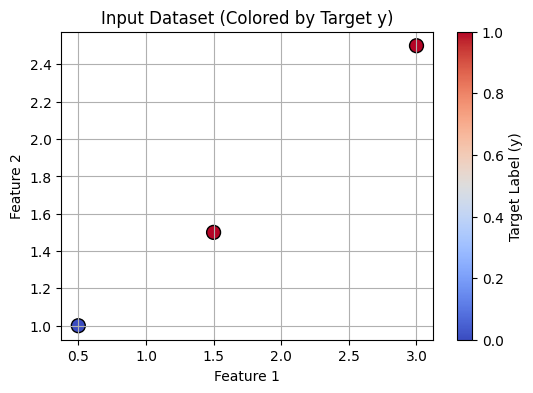

In [3]:
# Synthetic dataset: X contains input features, y contains target labels
X = torch.tensor([
    [0.5, 1.0],
    [1.5, 1.5],
    [3.0, 2.5]
], dtype=torch.float32)

# Target labels (0 or 1 for binary classification type problems)
y = torch.tensor([
    [0.0],
    [1.0],
    [1.0]
], dtype=torch.float32)

print("Input data X:")
print(X)
print("\nTarget data y:")
print(y)

# Visualize the input dataset
plt.figure(figsize=(6, 4))
scatter_y = y.squeeze().numpy()  # Use y for color if available and meaningful
plt.scatter(
    X[:, 0].numpy(),
    X[:, 1].numpy(),
    c=scatter_y,
    cmap='coolwarm',
    s=100,
    edgecolor='k'
)
plt.title('Input Dataset (Colored by Target y)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Target Label (y)')
plt.grid(True)
plt.show()


Step 4: Instantiating the Model and Inspecting Initial Weights
NN takes height and weight and produces yes or no

In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=1, bias=True)

    def forward(self, x):
        z = self.fc1(x)
        return torch.sigmoid(z)


Model architecture:
SimpleNN(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

Initial weights of fc1:
tensor([[0.5406, 0.5869]])

Initial bias of fc1:
tensor([-0.1657])


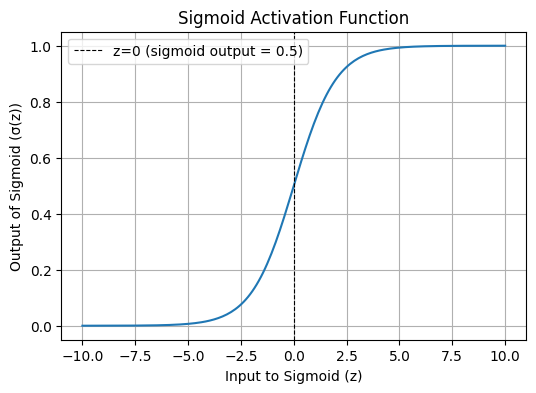

In [6]:
# Instantiate the model
model = SimpleNN()

print("\nModel architecture:")
print(model)

# Store initial weights and bias for plotting
initial_weights = model.fc1.weight.data.clone()
initial_bias = model.fc1.bias.data.clone()

print("\nInitial weights of fc1:")
print(initial_weights)

print("\nInitial bias of fc1:")
print(initial_bias)

# Visualize the Sigmoid Activation Function
plt.figure(figsize=(6, 4))

z_vals = torch.linspace(-10, 10, 200)
sigmoid_vals = torch.sigmoid(z_vals)

plt.plot(z_vals.numpy(), sigmoid_vals.numpy())
plt.title('Sigmoid Activation Function')
plt.xlabel('Input to Sigmoid (z)')
plt.ylabel('Output of Sigmoid (σ(z))')
plt.grid(True)

# Mark z = 0 where sigmoid output is 0.5
plt.axvline(
    0,
    color='black',
    linestyle='--',
    lw=0.8,
    label='z=0 (sigmoid output = 0.5)'
)

plt.legend()
plt.show()


Step 5 code (Forward Pass – Raw Output)

In [7]:
def visualize_forward_pass_predictions(model_instance, X_data):
    model_instance.eval()
    with torch.no_grad():
        raw_outputs = model_instance(X_data)  # These are already sigmoid outputs

    print("\n--- Forward Pass Visualization (Sigmoid Outputs) ---")
    for i in range(X_data.shape[0]):
        input_sample = X_data[i]
        output_prediction = raw_outputs[i]

        # Also show the input to the sigmoid (pre-sigmoid z) for inspection
        with torch.no_grad():
            pre_sigmoid_output = model_instance.fc1(input_sample.unsqueeze(0))

        print(
            f"Input: {input_sample.numpy()} -> "
            f"Pre-Sigmoid: {pre_sigmoid_output.item():.4f} -> "
            f"Sigmoid Output: {output_prediction.item():.4f}"
        )

    return raw_outputs


model_outputs_after_sigmoid = visualize_forward_pass_predictions(model, X)



--- Forward Pass Visualization (Sigmoid Outputs) ---
Input: [0.5 1. ] -> Pre-Sigmoid: 0.6916 -> Sigmoid Output: 0.6663
Input: [1.5 1.5] -> Pre-Sigmoid: 1.5256 -> Sigmoid Output: 0.8214
Input: [3.  2.5] -> Pre-Sigmoid: 2.9234 -> Sigmoid Output: 0.9490


Step 6: Plotting Input vs. Output

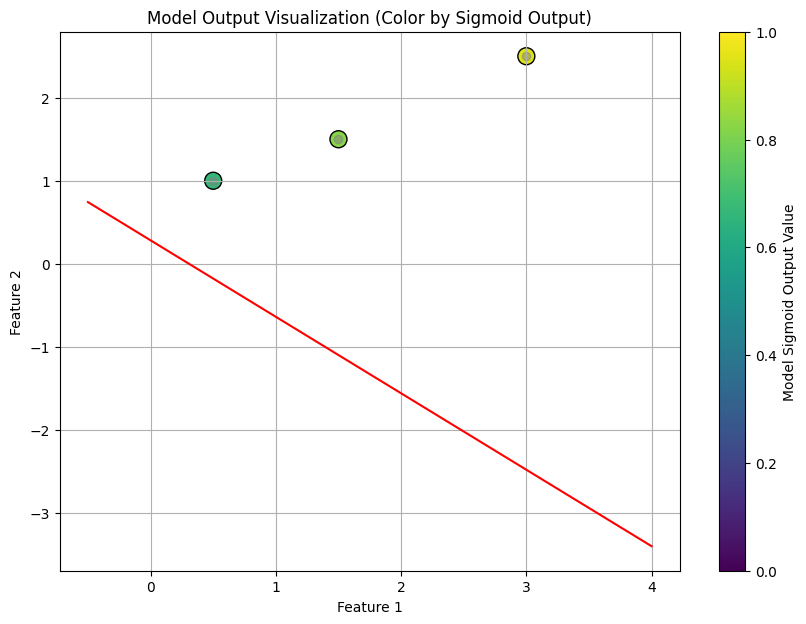

In [8]:
# Step 6: Plotting Input vs. Output

# Convert model outputs to NumPy
plot_outputs_np = model_outputs_after_sigmoid.numpy()

plt.figure(figsize=(10, 7))  # Larger figure for clarity

# Scatter plot of input features
# Color of each point is determined by the model's sigmoid output
scatter = plt.scatter(
    X[:, 0].numpy(),
    X[:, 1].numpy(),
    c=plot_outputs_np.squeeze(),
    cmap='viridis',
    s=150,
    edgecolor='k',
    vmin=0.0,
    vmax=1.0
)

plt.title('Model Output Visualization (Color by Sigmoid Output)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Model Sigmoid Output Value')
plt.grid(True)

# Overlay the initial decision boundary (z = 0 line)
current_ax = plt.gca()
plot_decision_boundary(
    X,
    initial_weights,
    initial_bias,
    current_ax,
    'Initial Boundary (z=0)',
    linestyle='-',
    color='red'
)

plt.show()


Step 7: Plotting Original vs. Model Boundaries

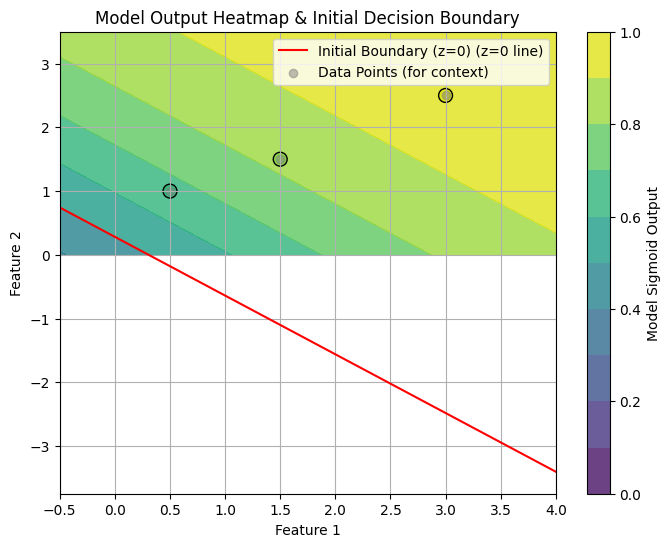

In [9]:
# Step 7: Plotting Original vs. Model Boundaries

model.eval()
with torch.no_grad():
    # Create a grid of points
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 100),
        np.linspace(x2_min, x2_max, 100)
    )

    # Convert grid to PyTorch tensor
    grid_tensor = torch.tensor(
        np.c_[xx1.ravel(), xx2.ravel()],
        dtype=torch.float32
    )

    # Get model predictions for each point on the grid
    grid_predictions = model(grid_tensor).reshape(xx1.shape)

# Plot the heatmap and boundaries
plt.figure(figsize=(8, 6))

# Heatmap of model sigmoid outputs
contour = plt.contourf(
    xx1,
    xx2,
    grid_predictions.numpy(),
    cmap='viridis',
    alpha=0.8,
    levels=np.linspace(0, 1, 11)
)

plt.colorbar(contour, label='Model Sigmoid Output')

# Plot original data points
plt.scatter(
    X[:, 0].numpy(),
    X[:, 1].numpy(),
    c=plot_outputs_np.squeeze(),
    cmap='viridis',
    s=100,
    edgecolor='k',
    vmin=0,
    vmax=1
)

# Overlay the initial decision boundary (z = 0)
plot_decision_boundary(
    X,
    initial_weights,
    initial_bias,
    plt.gca(),
    'Initial Boundary (z=0)',
    linestyle='-',
    color='red'
)

plt.title('Model Output Heatmap & Initial Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
